# Navigation

*Use these links to find the section that you would like to view*

- [SKIP Prologue](#skip-prologue)
- [GO TO INDIVIDUAL CHALLENGE](#go-to-indi-challenge)
<br/><br/>
* Prologue
    - [The dataset](#the-dataset)
    - [Linear regression (OLS)](#linear-regression)
    - [Inspiration](#inspiration)
    - [The plan](#the-plan)
<br/><br/>
* Proof of concepts
    - [Genetic algorithm explanation](#ga-explained)
    - [Pathfinding POC](#pathfinding-poc)
    - [Snake POC](#snake-poc)
    - [NEAT](#neat)

# Prologue

### This prologue chapter will describe what progress is made and what experiments are tried before the individual project is getting started.

I started this semester by looking through some of the datasets on Kaggle, but most of these datasets have many features and lots of data. But with all beginnings it is a good thing to start with something easy to predict and visualize.

The main experiment in the prologue will be trying to find a Kaggle dataset that has atleast a a little bit of a linear connection with the outcome and a single feature. This makes it possible to try out one of the simplest machine learning algorithms, Linear Regression. Because linear regression with only a single feature is so simple compared to the other algorithms  the plan is to write all the code for this algorithm from scratch to try and get a deeper understanding of how a computer can 'learn' things. Then later when the individual project is started the hope is that this deeper understanding can help me when I start using libraries to do the machine learning algorithms for me.

## Prologue backlog
Things to do during the prologue chapter:
- [x] Create a Jupyter notebook
- [x] Find a dataset with a possible linear correlation
- [x] Split the data in training and test data
- [x] Write the linear regression code
- [x] Train and test with the data
- [x] Visualize the results 

<a id='the-dataset'></a>
## The dataset

Prior to this prologue I watched a few videos on linear regression to get an idea about how it works and the the math involved.
[Linear Regression with Ordinary Least Squares Part 1](https://www.youtube.com/watchv=szXbuO3bVRk&ab_channel=TheCodingTrain)
In this video series from the coding train he uses the example of the linear connection between the temperature outside and the amount of ice cream sold. Of course many more features could be included such as the day of the week, humidity etc and it would likely give a more accurate prediction, but for learning purposes and to get started with linear regression just looking at the temperature will suffice. 

Kaggle has a lot of complicated datasets and after looking at datasets for a while before starting this prologue I decided to just look for the example given in the Coding Train video. And this is the dataset I found: [Ice Cream Revenue](https://www.kaggle.com/datasets/vinicius150987/ice-cream-revenue). The only problem I have with this dataset is that it only includes the temperature and the revenue. I would have liked more features to try and make a correlation heatmap to see if the temperature would be the biggest factor in determining the revenue. I will still try to do it with this dataset just to see what happens.

The revenue in the dataset is in US dollars and the temperature is in degrees Celcius.

In [1]:
import pandas as pd

# df = dataframe (Data sturcture in pandas)
df = pd.read_csv('Datasets/IceCreamData.csv')
print('Shape: ' + str(df.shape))
df.head()

Shape: (500, 2)


,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


## Splitting the dataset

To have unseen data to verify the results the data will be split up in training and test data. For now the data will be arbitrarily split into **80% training data and 20% test data**.

In [2]:
from sklearn.model_selection import train_test_split
import math

train_data, test_data = train_test_split(df, test_size=0.2)
print('Training data shape: {}'.format(train_data.shape))
print('Test data shape: {}'.format(test_data.shape))
train_percent = math.floor(train_data.shape[0] / df.shape[0] * 100)
test_percent = math.floor(test_data.shape[0] / df.shape[0] * 100)
print('Split percentage (Training|Test) ({}|{})'.format(train_percent, test_percent))

Training data shape: (400, 2)
Test data shape: (100, 2)
Split percentage (Training|Test) (80|20)


## Plotting the dataset and predictions

I am going to plot the dataset to see if there is a linear correlation between the temperature and the revenue. The expectation is that there will be a linear correlation since the description of this dataset in Kaggle mentioned that the dataset 'is a simple sample dataset for training'. There could be a few outliers because the data is split up on revenue per day, but it also could be removed by the owner of the dataset because the dataset is just for beginners to get started.

And obviously the expectation is that the higher the temperature the higher the revenue will be. This means that the line that will be predicted will look something like this: <img alt="Expected Line" src="https://i.imgur.com/ZnRufks.png"/>

The formula for a line is \begin{equation} y = mx + b
\end{equation} and my prediction is that the value for b is going to be low as it is the intersection with the y-axis or the value when x = 0 which in this case means 0 degrees celcius.

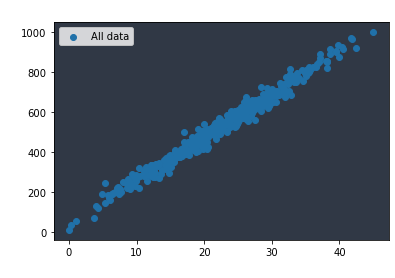

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

# layout for all the graphs
plt_bg_color = '#303845'
plt_alpha = 0.08
plt_outline_color = 'white'
plt_txt_color = 'white'

def setup_layout():
    fig = plt.figure()
    fig.patch.set_facecolor(plt_outline_color)
    fig.patch.set_alpha(plt_alpha)
    ax = fig.add_subplot(1,1,1)
    ax.set_facecolor(plt_bg_color)

def setup_graph():
    plt.xlabel('Temparature', color=plt_txt_color)
    plt.ylabel('Revenue', color=plt_txt_color)
    plt.legend(loc='upper left')
    plt.show()

    
setup_layout()
plt.title('The complete dataset', color=plt_txt_color)
plt.scatter(df['Temperature'], df['Revenue'], color = '#2071A9', label = 'All data')
setup_graph()

As expected the data points are clearly scattered in close proximity of a line. There are also no real outliers, which is not what I hoped because I would have liked to get some practice removing outliers from the dataset.

<a id='linear-regression'></a>
## Linear regression

In my understanding linear regression is a way for a machine to try and find the best linear formule for the training data that is given. Where the x-axis is the feature that is used for the prediction and the y-axis the value that is being predicted. The formula for a line is y = mx + b and since x is the input linear regression tries to find the best m and b value for the given data. After the best line for the data is found new input data can be given and the line can predict what the output will be.  

There also seem to be multiple methods to apply linear regression:
* Ordinary least squares
* Gradient descend

There might me more than the once listed above but these are the ones I found so far.
For this prologue I am atleast going to look at the ordinary least squares method first, because I already looked at gradient descend before starting this semester and the math can become very complex and gradient descend can also be used when training a neural network, so maybe something to look at later in the semester.

## Ordinary least squares

Ordinary least squares (OLS) is a way of estimating the unknown parameters (m and b) in a linear regression model. The algorithm that I am going to use for OLS is: ![OLS algorithm](https://i.imgur.com/XgxOYJf.png)This algorithm was explained in part 2 of the Coding Train series [Linear Regression with Ordinary Least Squares Part 2 ](https://www.youtube.com/watch?v=_cXuvTQl090&ab_channel=TheCodingTrain) The algorithm looks at the squared sum of all the errors and tries to minimize the sum. The errors get squared to make the negative numbers (the errors below the predicted line) not cancel out the positive errors above the line. 

![OLS error](https://i.imgur.com/5rYA5N7.png)

The OLS algorithm needs the average of all the x and y values so I get those from the training data.

In [4]:
# There must be a more proper way to get the average of a DataFrame / series

x_train_data = train_data.loc[:,'Temperature'].tolist()
y_train_data = train_data.loc[:, 'Revenue'].tolist()
x_avg = sum(x_train_data) / len(x_train_data)
y_avg = sum(y_train_data) / len(y_train_data)
print('x average: {} | y average: {} '.format(x_avg, y_avg))

x average: 21.91531608832 | y average: 515.0960322216749 


After calculating the averages it is possible to apply the rest of the formula on the training data.
m is calculated with the formule shown earlier.
When m is known b is easy to calculate. Because a linear formula is **y = mx+b**, which can be written as **b + mx = y** if both sides are reduced with mx we get the formula for b. **b = y - mx**

In [5]:
m = b = 0

# Ordinary least squares
numerator = 0 # teller
denominator = 0 # noemer
for i in range(len(x_train_data)):
    x = x_train_data[i]
    y = y_train_data[i]
    numerator += (x - x_avg) * (y - y_avg)
    denominator += (x - x_avg) ** 2
m = numerator / denominator # could be scary if denominator is 0, but that is very unlikely 
b = y_avg - m * x_avg

print('y = {} * x + {}'.format(round(m,2), round(b,2)))

y = 21.39 * x + 46.33


If I did it right the best m value for the line is approximately **21.27** and the best b value would be approximately **49.18**. I don't have an idea on how to check if this is good or not or how to give it an accuracy score. But a good first indication might be too look at the average error between all points in the training and test data. The average error in the training data should be lower, but it might not be a huge difference without the outliers and a data set that fits linear regression so well.
> After re-running the Kernel it seems that the data that is taken when splitting is random. This means that the results are not exactly the same everytime the Kernel runs.

In [6]:
avg_error_train = 0;
for i in range(len(x_train_data)):
    x = x_train_data[i]
    y = y_train_data[i]
    avg_error_train += abs(y - (m * x + b))

avg_error_train /= len(x_train_data)


x_test_data = test_data.loc[:,'Temperature'].tolist()
y_test_data = test_data.loc[:, 'Revenue'].tolist()
avg_error_test = 0;

for i in range(len(x_test_data)):
    x = x_test_data[i]
    y = y_test_data[i]
    avg_error_test += abs(y - (m * x + b))

avg_error_test /= len(x_test_data)

print('Average error in training data: {} \nAverage error in test data: {}'
      .format(round(avg_error_train,2), round(avg_error_test,2)))

Average error in training data: 19.83 
Average error in test data: 18.64


To figure out if what I did was even remotely right I will try to loop through all reasonable values for m and b to see if I can find a line that can better represent the data. I get that this method is flawed because I it will only loop through integer numbers an ignore decimal values. But it still should give an indication if the line that I found is reasonable.

In [7]:
# bf = brute force
avg_error_bf = avg_error_train + 1;  
bf_errors = []


for m_val in range(50):
    for b_val in range(75):
        avg_error_bf = 0
        for i in range(len(x_train_data)):
            x = x_train_data[i]
            y = y_train_data[i]
            avg_error_bf += abs(y - (m_val * x + b_val))
        
        avg_error_bf /= len(x_train_data)
        bf_errors.append(avg_error_bf)
        if avg_error_bf <= avg_error_train:
             print('A BETTER LINE FOUND WITH M: {} AND B: {} avg error {}'.format(rand_m, rand_b, avg_error_random))

print('Lowest error found: {}\nLOS error: {}\nDifference: {}'
      .format(
          min(bf_errors),
          avg_error_train,
          min(bf_errors) - avg_error_train)
       )

Lowest error found: 19.93412899262001
LOS error: 19.829402581684366
Difference: 0.10472641093564405


This little test shows that there are atleast no rounded number within a reasonable range that fits the data closer than what I found using OLS. This result makes me think that I applied the algorithm correctly, but there still might be a better solution out there. 

And the difference between the brute force method and the OLS method is really low, in some splits less than 0.2. This was not what I expected. But OLS still gives a better result than this brute force method and will hold up better with a larger dataset, because the time to calculate the values doesn't increase exponentially.

The last way I will try to find if the results of the OLS algorithms are useful I will try to plot the test data and the prediction line in the same graph. If they overlap the line found by the algorithm is a good fit for the data. I didn't do this step earlier because I didn't know how to draw multiple things in a single graph, but after training more with the pandas course from Kaggle and reading documentation on the plotlib library I figured it out.

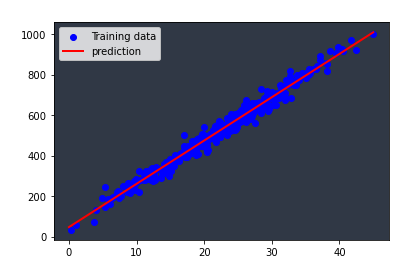

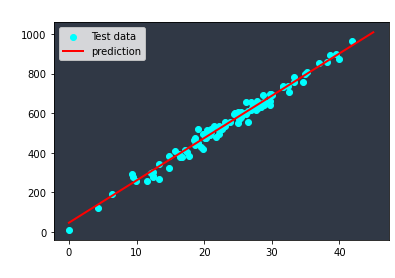

In [8]:
import numpy as np

# Setting up the line
min_x = df['Temperature'].min()
max_x = df['Temperature'].max()
x = np.linspace(min_x, max_x, 2) # create the outer points of the line

def draw_prediction_graph(title, label, dataset, scatter_color):
    setup_layout()
    plt.title(title, color=plt_txt_color)
    plt.scatter(dataset['Temperature'], dataset['Revenue'], color = scatter_color, label = label)
    plt.plot(x, m * x + b, color = 'red', label = 'prediction', linewidth = 2)
    setup_graph()
    
# Training data with prediction
draw_prediction_graph('Training data with prediction line', 'Training data', train_data, 'blue')

# Test data with prediction
draw_prediction_graph('Test data with prediction line', 'Test data', test_data, 'cyan')






## Prologue conclusion

During this prologue I learned a lot: I managed to find a dataset that would be easy to startwith,  I started working with a Jupyter notebook and got used to using the Python syntax, I plotted graphs with the matplot library and split the dataset in test and training data and finally applied linear regression with the ordinary least squares method to calculate a line that fits the dataset. After that I validated my results by calculating the average error, trying out a brute force algorithm to see if my answer is reasonable and I plotted the prediction line against the data. And even though I succeeded with this dataset, the computer did not really learn, it just applied a mathemetical formula on all the given data at once to find the best line. 
During the rest of the semester I would also like to look at problems that are more complex and where the computer gradually gets better until it can confidently solve the problem.


## Version control
After writing the Prologue it seemed like a good idea to put the notebook into Git and onto Github for version management and to have an online backup. It is also good preperation for the group project that likely will also have a notebook on Github.

As a software major I try not to overengineer the projects that I pursue during this semester I think putting the project on Github still adds value, especially for the group projects, but also in addition to the checkpoints that Jupyter creates.

Because of my major it was easy to put the notebook into Git. The only downside is that because the notebook is a mixture of markdown and code spread over different cells, the changes are difficult to view. The solution I found was using a tool called [ReviewNB](https://app.reviewnb.com/) that lets you view the changes on Github. In the near future I would also like find a solution to view my changes locally before I push them to Github.

After reading this [blog](https://blog.reviewnb.com/jupyter-version-control/) I found the option of adding [jupyterlab-git](https://github.com/jupyterlab/jupyterlab-git) to the notebook, but I couldn't get this to work. So instead I will use the merge editor from Visual Studio Code to deal with local merge requests in the notebook.

<a id='inspiration'></a>
## Inspiration

The goal after writing the Prologue is to find inspiration for my individual challenge of the semester. Before the start of this semester I did a little bit of research into NN (neural network(s)) and I would like to learn more about how they can be applied and structured.

Before the start of the semester I already followed youtubers that also made videos about AI, so that is the first place I went to for inspiration. I watched all the projects made by Code Bullet and the series about [Genetic Algorithms](https://www.youtube.com/playlist?list=PLRqwX-V7Uu6bJM3VgzjNV5YxVxUwzALHV) by The Coding Train. Here I learned that a genetic algorithms is basically a type of reinforcement learning that is trying to simulate the idea of evolution theory with code. I instantly got hooked on the idea of doing something with a genetic algorithm, because of a couple reasons:
  - I find the idea of applying real world phenomena in code appealing;
  - It is great for story telling and visualisation and validation, because when you do it right you can actually see the agents improving and evolving over time.
  - The results can be fascinating, funny and unpredictable as the agents might try to cheat the system, fail horribly in the beginning or come up with revolutionary ideas while improving. 
  - A genetic algorithm can be used together with a neural network.
  - Agents can become so good at some of the tasks that humans could never compare.
  
The projects that inspired me the most are:
<br/>
<br/>
<p style="text-align: center;"><b>NeuroEvolution Flappy Bird from The Coding Train</b></p>
<img src='https://i.imgur.com/ZqECySW.png' alt='NeuroEvolution Flappy bird'>
 
<p style="text-align: center;"><b>NeuroEvolution Jump King from Code Bullet</b></p>
<img src='https://i.imgur.com/SzM9tHR.png' alt='NeuroEvolution Jump King'>

<br/>
In one of the Code Bullet videos he mentioned that he is using an algorithm similar to what Open AI used to beat dota. I never heard of Open AI, but I know that Dota is a very hard game to play for a computer therefore I started looking into the projects build by open AI. There I found the following inpressive projects:

<p style="text-align: center;"><b>Open AI Five playing Dota 2</b></p>
<img src='https://i.imgur.com/efCubqT.png' alt='Open AI Five playing Dota 2'>
Open AI managed to beat the world champions with their Dota AI
They also used NeuroEvolution and self play to teach AIs to play hide and seek.  

<p style="text-align: center;"><b>Open AI playing hide and seek</b></p>
<img src='https://i.imgur.com/94MlTS2.png' alt='Open AI playing hide and seek'>

These open AI projects are really impressive to me as Dota is very difficult to teach, because it is a really complex game with lots of variety and an environment that is constantly changing. It also is a team game requiring the bots to play well together.  

The hide and seek game peaked my interests, because the different generations got placed in increasingly diffucult scenarios and everytime either the hiding (defending) or seeking (attacking) team came up with a new stratergy later generations of the other team would find a way to break the new found strategy. And eventually the attacking team even found a way to break the physics engine to surf on top of a box and jump over the walls set up by the defending team (shown in the image below).  

<p style="text-align: center;"><b>Attacking team cheating the system</b></p>
 <img src='https://i.imgur.com/pKDNzsf.png' alt='Attacking team box surfing hide and seek'>

Of course Open AI is a major company and this is unrealistic for my individual challenge, but the hope is that my individual challenge will also have the different generations show funny, genius or unexpected solutions that humans can learn from. I also think that AI works best when the powers of the AI and Humans are combined, so if time allows it I would also like to implement a way for humans to be in the created environment alongside the AI.
<br/>

<p style="text-align: center;"><b>Primer</b></p>
Through watching videos of the channels above I also found the [Primer youtube channel](https://www.youtube.com/primerlearning). This channel has a lot of videos of visualizations of genetic algorithms in different environments. And the subjects covered by Primer are also really well explained and easy to understand.

![Primer Foraging Video](https://i.imgur.com/NKegoJo.png)

His video about [Simulating Foraging Decisions](https://youtu.be/nsVD8VPh96w) gave me the idea to create a survival simulation for my individual project.

But to be a managable project it has to be an easy simulation with easy decisions like should I forage a tree for food or should I cut down the tree for wood and create a fire?

![Easy Not Difficult](https://i.imgur.com/uZvHALX.png)


<a id='skip-prologue'></a>
# The plan

After finding these various sources of inspiration I decided that I want to make a survival simulator. The survivors could have stats like hunger and warmth, thirst and they need to find resources to keep their stats up. 

The creatures that survive long enough will have a higher chance of producing offspring. This should lead to later generations being able to survive longer than their predecessors. 

I think this is an ambitous plan and for that reason I will start simple and make the environment more complex once the survivors have found a consistant way or surviving in their current environment.

If the project goes really well then later environments could include things like the survivors being able to make a fire to stay warm, animals trying to hunt the survivors or a mechanic to encourage the survivors to work together (Altruism / Inclusive fitness).

### The goals
These are the goals I hope to achieve with this challenge:
  - Create a simple survival simulator that can be made more complex in the future.
  - Use a genetic algorithm to evolve the creatures to get better at surviving and adapting to their environment
  - Collect and visualize the data generated by the creatures and the world and use this to find generations with funny, unexpected or clever behaviour.
  - Allow a human to enter the simulation and survive with the AI's to see how humans and AI's interact.


### Prototyping idea 
I want to start by building a quick prototype to see if I am going to run into any limitations. I am planning to use PyGame for the visualisation, but do the other calculations myself so the program can run and train without PyGame aswell.
For the first version of the simulation the plan is to only have survivors and trees in the world and see if the survivors can learn to harvest fruit from the trees to survive.

Before building the survival prototype I wanted to get used to PyGame. And an easy project to learn the ropes is the classic game snake.
<br>
<p style="text-align: center;"><b>Learning PyGame with snake</b></p>

![Snake in PyGame](https://i.imgur.com/nMtLab5.png)

<p style="text-align: center;"><b>First version of the survival simulation</b></p>

![First prototype](https://i.imgur.com/Dl62fHm.png)
<br>
#### Optimizations
I took a few precautions to help with the simulation speed and hopefully help speed up the training later, but because these optimizations are not closely related to AI I will not discuss them here. I however will discuss them in the [Readme file](https://github.com/MatthijsFontys/AISocietyIndividualProject/blob/master/README.md) that is on the Github for this project.

<a id='ga-explained'></a>

# Genetic algorithm

In the goals section I specify that I want the survivors to solve their environment using a genetic algorithm. To clarify this I will define my definition of a genetic algorithm below:
<br/><br/>

A genetic algorithm is an algorithm that starts with a population of a chosen size. Each member of the population gets their DNA randomly generated. Then all members of the population are continuously given a fitness score based on their performance. 
<br/><br/>
The population must be able to change. This can happen through replacing the old generation with an entirely new generation all at once, or by removing members with a low fitness score and slowly adding new members to the population.
<br/><br/>
The process of creating new members fit for the population is the following:
- Two parents are chosen from the current population with a probability according to relative fitness.
- New members have DNA that is combined from its parents. (crossover)
- The new member's DNA is changed (mutated) based on a given probability (mutation rate) to account for a possible lack of variety in the starting population.
- The new unit is added to the population

<img alt="Genetic algoritym explained" src="https://i.imgur.com/78s1aOR.png" style="width:50%;height:auto"/>

<br/>

Each new generation also gets a fitness value and eventually replaced with members of a new generation.

To clarity: the DNA can be anything that can help a member of the population achieve its goals. In simple scenarios these even could be arrays of integer values or Vectors. But in more complex scenarios and changing environments the DNA consists of a neural network. Where each generation evolves the values for the weights in the network. And atleast in my understanding when a genetic algorithm gets paired with Neural Networks it is called NeuroEvolution



<a id='pathfinding-poc'></a>

# Genetic Algorithm pathfinding

A genetic algorithm can potentially find a solution for the given problem as long as the environment does not change. This means it is possible to learn and implement the pinciples of a genetic algorithm without having to also add a Neuralnetwork immediately.

The plan was to first try out the genetic algorithm with snake, but the snake environment keeps changing, because the food appears in random locations. For this reason I am going to make a genetic algorithm that will try to find the shortest path to its destination. A real pathfinding algorithm would probably do this faster, but it is just to try out the genetic algorithm principles.

But in the end I also would like to visualize the solution, so this is the environment vizualised with PyGame.

A few notes:
- The blue tile is the starting tile
- The green tile is the finish
- The AI can not move diagonally

<img alt="Path Finding Environment" src="https://i.imgur.com/HDfPbpH.png" style="width:55%;height:auto"/>




## Initial population

To create the initial generation a list is filled with agents that are going to find the best path. But the initial population will likely do poorly, because their DNA will be set to random values at first.

The DNA that the agents get is just a long list with directions, so either up, down, left or right.
For the length of the DNA list I choose 64, because this grid is 8 by 8 so the longest possible route is 64 so by matching this in the DNA length the agents will always have enough instructions.

For the notebook I make only 10 for the initial population, because it will make the visualization easier. The actual code used a population size of 300.  

So the DNA of a single agent would look something like this

<img alt="Path Finding Environment" src="https://i.imgur.com/4MHGVvu.png" style="width:80%;height:auto"/>


In [9]:
import random

class PathDna:
    def __init__(self):
        # LEFT, RIGHT, UP DOWN
        self.OPTIONS = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        # actual code uses width * height for dna length
        self.data = [random.choice(self.OPTIONS) for i in range(10)]
        self.times_chosen = 0 # Just here for helping visualization of selection

class PathAgent:
    def __init__(self):
        self.dna = PathDna()
        self.score = 0
        self.times_chosen = 0
    

path_agents = []
for i in range(10):
    path_agents.append(PathAgent())


        

## Selection

For virtualization purposes I give the agents a score from 1 to 10 manually below, but in the actual code the agents get scored based on the following:
- Their distance from the finish
- If they reached the finish
- How many moves it took them to reach the finish

Then I use an algorithm to pick the parents for the next generation where the likelyhood of being picked is linked to their score.

In [10]:
summed_score = 0

for i, agent in enumerate(path_agents):
    score = (i + 1)
    agent.score = score
    summed_score += score

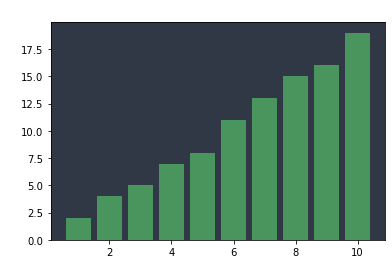

In [11]:
amount_to_choose = 10_000
for i in range(amount_to_choose):
    rand = random.random()
    for agent in path_agents:
        rand -= agent.score / summed_score
        if rand <= 0:
            agent.times_chosen += 1
            break
            
percent_score = []
scores = []
percent_chosen = []
for agent in path_agents:
    scores.append(agent.score)
    percent_score.append(round(agent.score / summed_score, 2))
    percent_chosen.append(round(agent.times_chosen / amount_to_choose,2) * 100)


selection_df = pd.DataFrame({
    'Score': scores,
    #'Percent of summed score': percent_score,
    'Percent of total chosen': percent_chosen
})

setup_layout()
plt.title('Agents times picked relative to score', color=plt_txt_color)
plt.bar(data=selection_df, x='Score', height='Percent of total chosen', color='#4A945D')
plt.xlabel('Score', color=plt_txt_color)
plt.ylabel('Percentage chosen', color=plt_txt_color) # Idk if this is correct tho

plt.show()


## Crossover

The dna of the offspring will equal the length of its parents' dna and for each part of the dna it will randomly get the value from either of its parents. 

In [12]:
OPTIONS = [(-1, 0), (1, 0), (0, -1), (0, 1)]

parent_a = path_agents[-1].dna.data
parent_b = path_agents[-2].dna.data
child_dna = []

for i in range(len(parent_a)):
    parent = random.choice([parent_a, parent_b])
    child_dna.append(parent[i])

# Visualizing the result
OPTIONS_TXT = ['Left', 'Right', 'Up', 'Down']
def dna_to_txt(dna):
    return map(lambda x: OPTIONS_TXT[OPTIONS.index(x)], dna)
    
data = [
    dna_to_txt(parent_a),
    dna_to_txt(parent_b),
    dna_to_txt(child_dna)
]
crossover = pd.DataFrame(data).transpose()
crossover.columns = ['Parent A', 'Parent B', 'Offspring']
crossover.head(10)
    

,Parent A,Parent B,Offspring
0,Right,Up,Right
1,Down,Down,Down
2,Up,Left,Up
3,Right,Right,Right
4,Up,Right,Up
5,Down,Up,Up
6,Left,Down,Down
7,Left,Up,Left
8,Down,Down,Down
9,Down,Left,Left


## Mutation

After the offspring inherited its dna from its parents each of the values has a chance according to the mutation rate to mutate into a random new direction to keep enough variation in the new populations. 

The actual mutation rate that I used is much lower around 3 percent, but for the example I use a high percentage to better show that some of the child's values change due to mutation.

Of course there is a chance that the new mutated value is the same as the value before mutation.

In [13]:
mutation_rate = 0.40

mutated_child_dna = child_dna.copy()

did_mutate = []
for i in range(len(child_dna)):
    should_mutate = random.random() <= mutation_rate
    if should_mutate:
        child_dna[i] = random.choice(OPTIONS)
    did_mutate.append(should_mutate)

data = [
    dna_to_txt(parent_a),
    dna_to_txt(parent_b),
    dna_to_txt(child_dna),
    dna_to_txt(mutated_child_dna),
    did_mutate
]
mutation = pd.DataFrame(data).transpose()
mutation.columns = ['Parent A', 'Parent B', 'Offspring', 'Mutated offspring', 'is mutated value']
mutation.head(10)


,Parent A,Parent B,Offspring,Mutated offspring,is mutated value
0,Right,Up,Up,Right,True
1,Down,Down,Down,Down,False
2,Up,Left,Right,Up,True
3,Right,Right,Up,Right,True
4,Up,Right,Up,Up,False
5,Down,Up,Up,Up,False
6,Left,Down,Down,Down,False
7,Left,Up,Right,Left,True
8,Down,Down,Down,Down,True
9,Down,Left,Left,Left,False


### Result

Below is the final result of this simple experiment, where each generation tries to get to the finish with the least amount of tiles used.

<img src="https://i.imgur.com/YAGhjG7.gif" alt="[Genetic algorithm result]" width="55%" height="auto" />



<a id='snake-poc'></a>

# Snake POC

After making this pathfinding project I wanted to get started with using a neural network, and to understand how a neural network functions. So my goal was to code my own feed forward neural network that I could use to try NeuroEvolution. I needed some guidance when learning how to make my own neural network so I consulted [this playlist](https://www.youtube.com/playlist?list=PLRqwX-V7Uu6aCibgK1PTWWu9by6XFdCfh) from the Coding Train. I know I use the Coding Train as a source a lot, but he explains everything so well and makes complex math and systems easy to understand even for me, which is the main reason I consult his videos this often.  
<br/>
I decided to split the neural network up into two classes a layer class for each hidden layer and in / output layer in the network. And a neural network class holding all the layers and being able to recursively call all the layers to compute the result.

In [14]:
class Layer:

    def __init__(self, input_count, node_count):
        # weight dimensions = (rows * columns) (nodes_in_layer * inputs)
        self.input_count = input_count
        self.node_count = node_count
        self.weights = []
        self.biases = []

        # initialize the weights with random values between -1 and 1
        for i in range(node_count):
            self.weights.append([])
            self.biases.append(random.random() * 2 - 1)
            for j in range(input_count):
                self.weights[i].append(random.random() * 2 - 1)

    # Sigmoid activation function
    def activate(self, values):
        return list(map(lambda x: 1 / (1 + np.exp(-x)), values))

    def feed_forward(self, inputs):
        values = np.matmul(self.weights, inputs)
        values = np.add(values, self.biases)
        return self.activate(values)

The layer class keeps track of the amount of nodes in the layer and the amount of inputs that go into the layer. It also keeps track of all the weights between the connections of the nodes in the previous layer that connect to this layer. Lastly it holds all the biases for its nodes.
Initially all weights are given a random value between -1 and 1. I used the sigmoid activation function, because it is easy to implement and is shown in a lot of examples. I also didn't have a good reason to change the activation function to something else.

In the tutorial series by the Coding Train he explains how in a feed forward network the weighted sum can be calculated by matrix multiplication and in the tutorial he continues to build his own matrix math library. This was not necessary for me since Numpy already has a method for matrix multiplication.

In [15]:
class NeuralNetwork:

    def __init__(self, input_count, output_count):
        self.input_count = input_count
        self.output_count = output_count
        self.layers = []

    def add_layer(self, node_count):
        input_count = self.input_count
        if len(self.layers) > 0:
            input_count = self.layers[-1].node_count
        self.layers.append(Layer(input_count, node_count))
        return self

    def build(self):
        self.layers.append(Layer(self.layers[-1].node_count, self.output_count))
        return self

    def feed_forward(self, inputs):
        for layer in self.layers:
            inputs = layer.feed_forward(inputs)
        return inputs

There is nothing special going on in the neural network class. It just holds the amount of in and outputs to the network and has a list containing all the layers. The build method is to add the final output layer and the feed forward method just calls the feed forward method in each layer with the output of the previous one. The final output is the output of the neural network.

Since this Neural network class is going to be used for NeuroEvolution I luckily did not have to include back propagation, because the math behind it does not seem easy.

This is how the following feed forward neural network could be used in my code
<img src="https://i.imgur.com/KlbrQGw.png" alt="[Example feed forward network]" width="50%" height="auto" />

In [20]:
brain = NeuralNetwork(input_count=3, output_count=2).add_layer(4).build()
inputs = [3,5,8]
results = brain.feed_forward(inputs)
print(results)

[0.2173454068702098, 0.6231525933086539]


### Applying the neural network in snake

To apply this neural network to snake I had to determine what the inputs and outputs were going to be. The outputs were not hard to decide, just the 4 directions that the snake can move in. The inputs were a little more difficult, but still fairly obvious. For the inputs I ended up choosing the following:

- The x and y location of the snake's head, so it can avoid going outside the map
- The x and y location of the food in relation to the snake's head
- The current direction the snake is going, because the snake is not allowed to make a 180 degree turn 
- How far the closest body part of the snake is in relation to its head in every direction, to try and make it not run into itself.

But the other aspects of the NeuroEvolution algorithm stayed the same. The parents are still picked based on their score. The DNA which in this case are the weights and biases in the neural network are copied randomly from the offsprings parents when a new generation is created and there still is a mutation rate to have a chance of slightly adjusting a weight of the child.

### Snake fitness function

The most difficult part was to implement the fitness function. I started by giving the AI a little bit of points for staying alive and a lot of points for finding the food. The idea behind giving it a few points for staying alive was to try and motivate it to not run into the edges of the playing field. What ended up happening was that the AI didn't care that it only got a few points for surviving, and just kept moving in a circle never trying to go after the food theoretically getting infinite points. At first I was really naive and tried to fix this by only giving it points for surviving if a snake visited all quarters of the play area, but instead of not circling the snakes just started to move in bigger circles, still avoiding the food. I finally fixed it by keeping track of a snakes path and killing the snake and giving it a harsh score penalty if it repeats the same pattern a few times without grabbing any food.


<a id='neat'></a>

# NEAT

I probably won't achieve the best results if I keep using my own neural network. This is why I was planning from the beginning to use a more sophisticated algorithm for my individual challenge, but here it also seemed smart to test it out on snake first since it is much less complicated than my own challenge.

The algorithm I planned to use is called neuroevolution of augmenting topologies or NEAT for short. 
Augmenting toplogy meaning that it works with neural networks of different sizes and connections. This means that the neural network does not necessarily connect all outputs to the inputs of the next layer like in my feed forward network. During mutation it is possible to add or remove a connection or to add a new node to a hidden layer. This is what makes the algorithm so great, because otherwise you would have to train the alogithm multiple times when trying out different sizes for the hidden layers. The other special thing that NEAT does is grouping the different networks into species and to keep the best network of each species alive regardless of its score. The reasoning behind this is that a network could have a good topology, but not yet the right values for its weights, protecting this topology by keeping the species alive gives different topologies a chance to evolve further. 

Neat is great, but also very complex which is why I choose to not implement this algorithm myself but use a library instead. And to my knowledge Neat is not inlcuded in libraries like Scikit or Pytorch which is why I used [Neat Python](https://neat-python.readthedocs.io/en/latest/neat_overview.html) instead.

I learned about Neat and how it works through:
- [This paper](https://nn.cs.utexas.edu/downloads/papers/stanley.ec02.pdf)
- [This video](https://www.youtube.com/watch?v=VMQOa4-rVxE)


### Neat snake

There is not too much to say about the implementation of Neat for the snake AI as I already had the fitness function from my own implementation. And after understanding Neat it was not too difficult to implement using the library. I however did start implementing the [strategy pattern](https://refactoring.guru/design-patterns/strategy) so I could easily switch between my own neural network and the neat implementation. This also allowed me to make different strategies for if the program should be training or showing the current best snake on screen, since running Pygame while training will slow the training down.

After it was done training I saw that it got way better than it did through my own feed forward network, and even though it was performing well and could get a length of around 25 consistently it would always end up dying by running into itself. But I decided not to improve my snake AI further as it was just supposed to be a proof of concept and I still had to start my individual challenge.

<p style="text-align: center;"><b>Neat AI playing snake</b> </p>
<img src='https://i.imgur.com/mvyFbjB.png' alt='Neat Snake' width='50%' />



<a id='go-to-indi-challenge'></a>

# Individual challenge

The plan for the individual challenge was still to make a virtual survival simulation where creatures have learn how to survive as long as possible. And while working on snake and learning about Neat I also worked on improving the look of the environment. 

<p style="text-align: center;"><b>Improved look of the environment</b></p>
<img src='https://i.imgur.com/KYZCzAW.png' alt='Environment look overhaul' width='80%' >

The first goal was still to implement a hunger mechanic where the fullness of an agent would slowly decrease and the agents can roam around the environment and pick berries from bushes when they get close to increase their fullness value. Each berry bush can hold up to 3 berries and slowly regrows berries once some have been foraged. An agent can forage a berry by walking close enough to a berry bush that has one or more berries. The agent then automatically forages the berry it does not explicitly have to clarify its intent to forage.

<p style="text-align: center;"><b>A hungry agent foraging berries</b></p>
<img src='https://i.imgur.com/gU5r8qY.gif' alt='Berry foraging animation' width='30%' >


### Implementing Neat in individual challenge

The plan was to implement Neat just like I did with snake, however it was more difficult in this instance, because the Neat library only allows you to make a whole generation at once instead of just a single agent. This is a problem because I want the environment to look fluid and lived in, instead of a battle royale where the agents survive until they all die and a new generation is instantly created. 
To solve this problem I created a waiting room where I can put agents that are created by Neat, but should not yet be born in the environment. And every frame there is a small chance that an agent from the waiting room will be released into the environment. This implementation worked, but still had the problem of the waiting room going empty resulting in no agents being born for a long time. This issue was solved by copying an agent that is doing well currently and placing that copy in the environment instead if the waiting room is empty.

In contrast to the Snake AI the fitness function for my individual challenge is very simple: the longer an agent survives, the higher its score. I could not add things to its score such as bonus points for picking berries as this could result in agents learning to forage berries even though they already have a full hunger bar.

Figuring out the outputs for the network was also not too difficult. Just an output for the 8 possible directions the agent can move in and 1 output for if the agent wants to keep standing still. 

The first strategy the agents came up with was to find a single bush and keep getting berries from that one bush, and as long as no other agents would choose the same bush they could survive for a long time. Even though the agents once again figured out the easiest option, it was not the behaviour I was looking for so I changed the regrow rate on the bushes so it would be impossible for an agent to survive with only a single bush.

### Neural network inputs

The most difficult about this challenge was figuring out good inputs for the neural network. The inputs I started with were the following:
- The x and y location of the agent
- The delta x and y to the closest berry bush
- The amoung of berries on the closest berry bush
- The current direction of the agent
- Its fullness (hunger) value

These inputs are similar to the inputs I used in the snake AI, but after training the AI it only slightly improved, and it didn't seem like would improve much further after training for longer. This was really surpsising to me, as I would have thought that just walking around and looking for berry bushes would be a really easy task for the AI to accomplish.

The reason I thought the inputs are flawed is that just giving information about the closest tree does not resemble how humans would see the environment. After struggling with this I went to the consultants and they advised me to look at scholarly atricles about projects that are tackling a similar problem. This seemed like a great idea and after not too long I found a great article about a Neat algorithm playing the first level of Mario. 

<p style="text-align: center;"><b>Neat Mario</b></p>
<img src='https://i.imgur.com/sWDTouR.png' alt='Neat Mario screenshot' width='60%' >

In the top left of the screenshot is an image of what the AI can see

<img src='https://i.imgur.com/PZiUZB7.png' alt='Environment look overhaul' width='30%' >

and as seen in the image, the AI cannot see every single pixel as that would be way too many inputs, but it can see the most important parts of the entire screen: the blocks that he can walk on and the enemies he needs to avoid.

I tried a similar approach of giving the AI as much information as possible about the environment without giving it too many inputs by cutting up what is on the screen in smaller sections and letting the AI know what the most important object is in each section.

<img src='https://i.imgur.com/2y3AN89.png' alt='Input Explanation' width='80%' >

First I took the 3x3 area surrounding an agent as its field of view. Then I split up each of those 9 blocks into sections of 4 resulting in 9*4 = 36 inputs.
But I also added a population input telling an agent how many other agents are in each of the 9 sections, which of course is another 9 inputs.
I also kept the inputs telling the agent about its current direction, location and hunger value.

While working on improving the inputs I also started implementing the cold mechanic where agents get a cold bar that slowly depletes and they can cut down a bush and turn it into a campfire that refills the cold bar of all the agents that stand close.
And after the campfire dies down a sapling will appear and slowly regrow into a bush.

<p style="text-align: center;"><b>An agent creating a campfire</b></p>
<img src='https://i.imgur.com/RhP9egq.gif' alt='Creating campfire animation' width='30%' >

### Training

Because I expected this training process to take a while I started training the AI on Azure by deploying it as a Docker container, but even after training for a long time the AI is not surviving for a long time. I expect this is because there are a lot of agents trying to look for food at the same time, making it way harder for a single agent to find a bush that is not empty. And when an agent gets better its competition gets better also, so my next step would have been to try a more isolated environment and see if that would make a difference. But since I only arrived at this point near the end of the semester and I still had some learning outcomes to prove I have not been able to try and improve the agents even more.

### Data collection

I wanted to try and prove the data preparation learning outcome with this project by gathering data produced by the environment. I used Pandas to make a dataframe with information about how many berries got foraged each day and I kept track of the population growth / decline and if the agents were dying of starvation or hypothermia. I was able to visualize this data on a web page by uploading the csv to Google docs and then using the google docs API to access the data as JSON and put it in a graph library. 